<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-PotterSR/blob/main/Oct06-07/Clase_7_Octubre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


- Primero tenemos que ver si nuestros datos tienene algún error.

- Definimos un modelo:
Para este caso, usamos un modelo lineal
$$ f = w_0 + w_1 x $$

Definimos un $\theta = [w_0, w_1]$.

1) Definimos un $\theta$ inicial.

2) Ahora generamos una propuesta $\theta = [gaussian(\theta_{min}[0], \sigma), gaussian(\theta_{min}[1], \sigma)]$

> Tenemos que generar dos nuevos números para nuestros paramétros, esto con una probabilidad gaussiana centrada en el punto anterior, y con un $\sigma$ predefinido para ambas.

3) Evaluamos los logaritmos.

> $\log(post(\theta_{ini})), \quad  \log(post(\theta_{prop}))$ \\
  Si log(post(\theta_{prop})) $>$ log(post(\theta_{ini}))
  >> Acepto $\theta_{prop}$ \\
     Guardo $\theta_{prop}$ \\
     $ \theta_{ini} = \theta_{prop}$

> Else:
  >> $p_{test} = Uniform(0,1)$ \\
     Si $\log(post(\theta_{prop})) -$ $log(post(\theta_{prop}))$ $> log(P_{test}))$ \\
     >>> Acepto $\theta_{prop}$ \\
     Guardo $\theta_{prop}$ \\
     $ \theta_{ini} = \theta_{prop}$ \\

>> Else: \\
  Regresar al paso (2);



In [2]:
data = np.loadtxt('/content/drive/MyDrive/Data/olympic100m_men.txt', delimiter = ',').T
x = data[0]
y = data[1]

y

array([12.  , 11.  , 11.  , 11.2 , 10.8 , 10.8 , 10.8 , 10.6 , 10.8 ,
       10.3 , 10.3 , 10.3 , 10.4 , 10.5 , 10.2 , 10.  ,  9.95, 10.14,
       10.06, 10.25,  9.99,  9.92,  9.96,  9.84,  9.87,  9.85,  9.69])

In [3]:
def model(x, theta):
  m, b = theta
  return b + m*x

In [4]:
def Like(x, y, theta):
  log = -1/2*np.sum((y- model(x, theta))**2)

  return log

Like(x,y, [.1, 31])

-629179.5647

In [8]:
def Prior(theta, limits):
  m, b = theta
  if (limits[0] < m < limits[1]) and (limits[2] < b < limits[3]):
    return 0.0
  return -np.inf

Prior([.5, 30], limits)

0.0

In [7]:
limits = [-1.0, 1.0, 20, 50]
sigma_m = .01
sigma_b = .2
paso_i = [-.01, 45]
N = 10

In [9]:
def mc(x, y, pasos, sigma_b, sigma_m, paso_inicial, limits):

  cadena = [paso_inicial]
  theta_old = paso_inicial
  rechazados = []
  aceptados = []
  #print(cadena)
  for _ in range(pasos):
    m_new = np.random.normal(theta_old[0], sigma_m)
    #print(theta_old[1])
    #print(sigma_m)
    b_new = np.random.normal(theta_old[1], sigma_b)
    #print(sigma_b)
    theta_new = [m_new, b_new]
    #print(theta_new)


    p_new = Like(x, y, theta_new) + Prior(theta_new, limits)
    p_old = Like(x, y, theta_old) + Prior(theta_old, limits)


    if (p_new > p_old):
      cadena.append(theta_new)
      aceptados.append(theta_new)
      theta_old = theta_new
    else:
      r = np.random.random()
      r = np.log(r)
      #pn = p_new/p_old
      pn = (p_new - p_old)
      #print(pn)
      #print(np.log(r))
      if (pn > r):
        cadena.append(theta_new)
        aceptados.append(theta_new)
        theta_old = theta_new
      else:
        cadena.append(theta_old)
        rechazados.append(theta_new)

  cadena = np.array(cadena)
  print('Fraccion de Rechazados', len(rechazados)/len(cadena))
  print('Fraccion de Aceptados', len(aceptados)/len(cadena))
  return cadena


In [10]:
paso_bueno = paso_i

In [11]:
limits = [-1.0, 1.0, 30, 44]
sigma_m = .001
sigma_b = .01
paso_i = [np.random.uniform(limits[0], limits[1]), np.random.uniform(limits[2], limits[3])]
N = 10000

paso_i

[0.23687015661058508, 43.57708706455679]

In [12]:
cad = mc(x, y, N, sigma_b, sigma_m, paso_i, limits)

Fraccion de Rechazados 0.857014298570143
Fraccion de Aceptados 0.14288571142885712


Fraccion de Rechazados 0.8495150484951505
Fraccion de Aceptados 0.1503849615038496


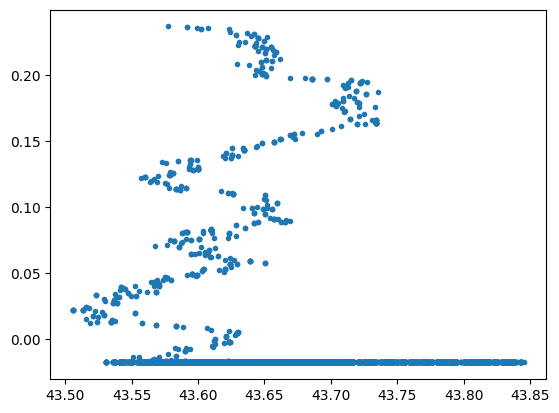

In [13]:
  cad = mc(x, y, N, sigma_b, sigma_m, paso_i, limits)
  plt.scatter(cad[:,1], cad[:,0], s = None, marker='.')

Text(0.5, 0, 'Paso')

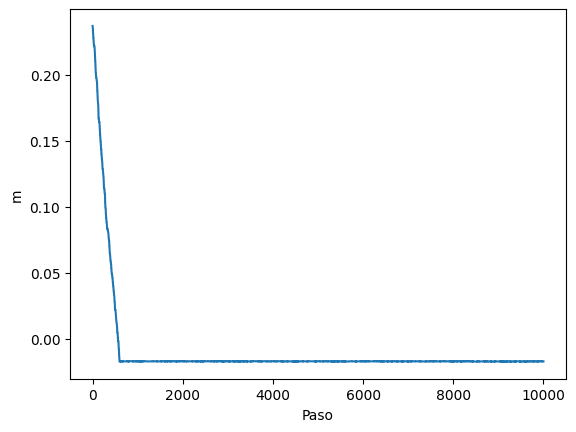

In [14]:
plt.plot(cad[:,0])
plt.ylabel('m')
plt.xlabel('Paso')

Text(0.5, 0, 'Pasos')

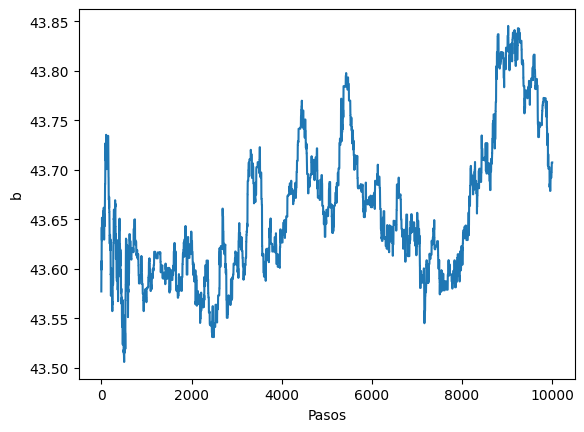

In [15]:
plt.plot(cad[:,1])
plt.ylabel('b')
plt.xlabel('Pasos')


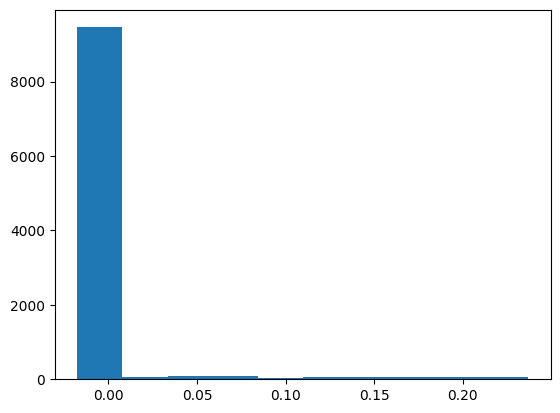

In [16]:
plt.hist(cad[:,0]);

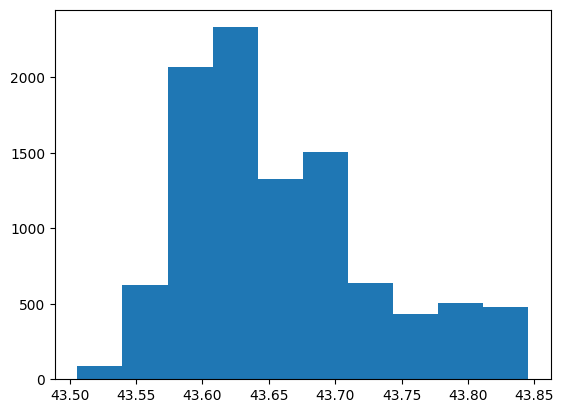

In [17]:
plt.hist(cad[:, 1]);

## Normalizando los datos

In [18]:
np.random.seed(43)

In [19]:
x_norm = (x-np.mean(x))/np.std(x)

limits = [-.8, 0, 5, 13]
sigma_m = .01
sigma_b = .2
paso_i = [np.random.uniform(limits[0], limits[1]), np.random.uniform(limits[2], limits[3])]
N = 20000

In [89]:
cadena = mc(x_norm, y, N, sigma_b, sigma_m, paso_i, limits)

Fraccion de Rechazados 0.3058847057647118
Fraccion de Aceptados 0.6940652967351633


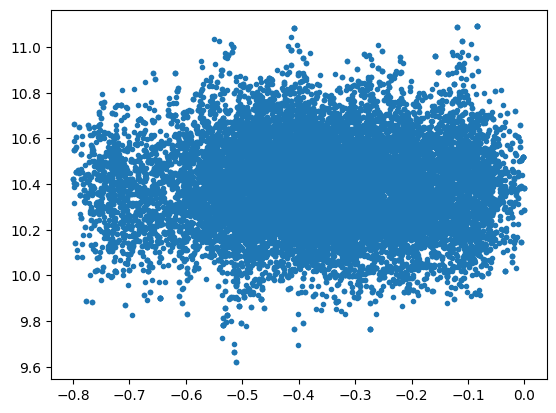

In [21]:
plt.scatter(cadena[:,0], cadena[:,1], s = None, marker='.')

In [22]:
w1 = np.mean(cadena[:,0][1000:])
w0 = np.mean(cadena[:,1][1000:])
print(np.mean(cadena[:,0][1000:]), np.mean(cadena[:,1][1000:]))

-0.3590126905857265 10.390477258493451


Text(0.5, 0, 'pasos')

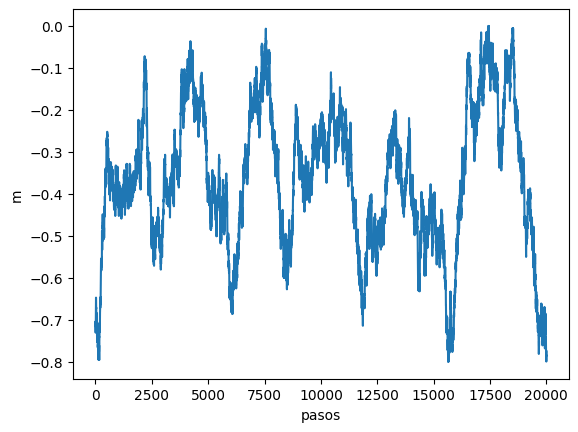

In [23]:
plt.plot(cadena[:,0])
plt.ylabel('m')
plt.xlabel('pasos')

Text(0.5, 0, 'Pasos')

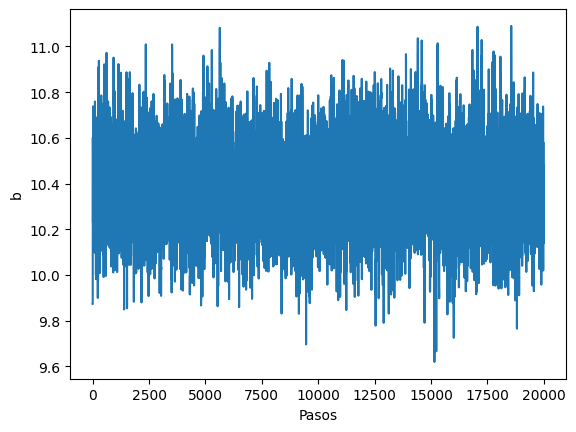

In [24]:
plt.plot(cadena[:,1])
plt.ylabel('b')
plt.xlabel('Pasos')

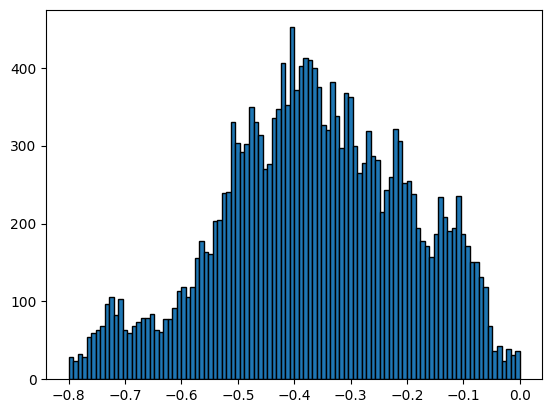

In [25]:
plt.hist(cadena[:,0], bins=100, edgecolor='black');

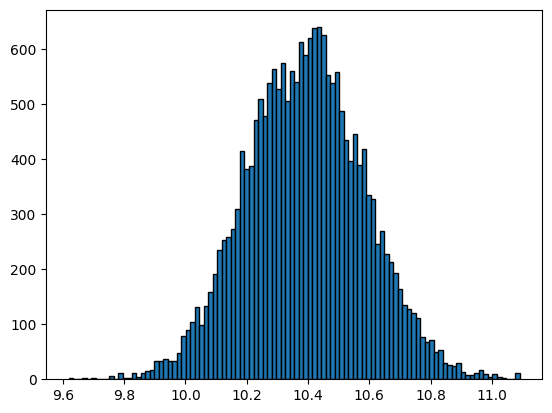

In [26]:
plt.hist(cadena[:,1], bins = 100, edgecolor='black');

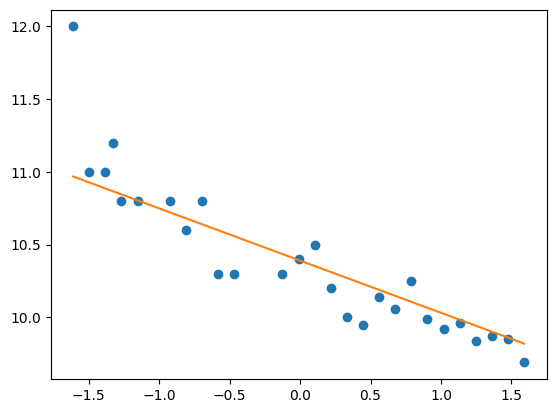

In [27]:
plt.plot(x_norm,y, 'o')
plt.plot(x_norm, model(x_norm, [w1, w0]))

Usando el Gelman-Rubin Diagnostic, creamos 5 cadenas para realizar el diagnóstico.

In [49]:
chains = []
vars = []
means = []
for i in range(5):
  cadena = mc(x_norm, y, N, sigma_b, sigma_m, paso_i, limits)
  chains.append(cadena)
  #print(cadena.shape)
  varm = np.var(cadena[:,0][1000:])
  varb = np.var(cadena[:,1][1000:])

  mean_m = np.mean(cadena[:,0][1000:])
  mean_b = np.mean(cadena[:,1][1000:])


  means.append([mean_m, mean_b])
  vars.append([varm, varb])



#mu_m = np.mean(means[0,:])
#mu_b = np.mean(means[1,:])

#means[0:]

Fraccion de Rechazados 0.30973451327433627
Fraccion de Aceptados 0.6902154892255388
Fraccion de Rechazados 0.30928453577321136
Fraccion de Aceptados 0.6906654667266636
Fraccion de Rechazados 0.30593470326483674
Fraccion de Aceptados 0.6940152992350382
Fraccion de Rechazados 0.3161341932903355
Fraccion de Aceptados 0.6838158092095395
Fraccion de Rechazados 0.30973451327433627
Fraccion de Aceptados 0.6902154892255388


In [71]:
means = np.array(means)
vars = np.array(vars)

means_m = means[:,0]
means_b = means[:,1]

variance_m = np.mean(vars[:,0])
variance_b = np.mean(vars[:,1])

mean_m = np.mean(means_m)
mean_b = np.mean(means_b)
#B/n
B_b = 1/4*np.sum((means_b - mean_b)**2)
B_m = 1/4*np.sum((mean_m - mean_m)**2)

In [72]:
sigma_squared_m = (20001 - 1)/(20001)*variance_m + B_m

sigma_squared_b = (20001 - 1)/(20001)*variance_b + B_b

In [73]:
R_m = np.sqrt(sigma_squared_m/variance_m)
R_b = np.sqrt(sigma_squared_b/variance_b)


In [74]:
print('R_m: ', R_m)
print('R_b: ', R_b)

R_m:  0.999975000937461
R_b:  1.0002676766032712


In [78]:
!pip install corner

In [79]:
import corner

In [103]:
x_norm = (x-np.mean(x))/np.std(x)

limits = [-.8, 0, 5, 13]
sigma_m = .01
sigma_b = .2
paso_i = [np.random.uniform(limits[0], limits[1]), np.random.uniform(limits[2], limits[3])]
N = 50000

In [104]:
cadena = mc(x_norm, y, N, sigma_b, sigma_m, paso_i, limits)

Fraccion de Rechazados 0.30969380612387754
Fraccion de Aceptados 0.6902861942761145


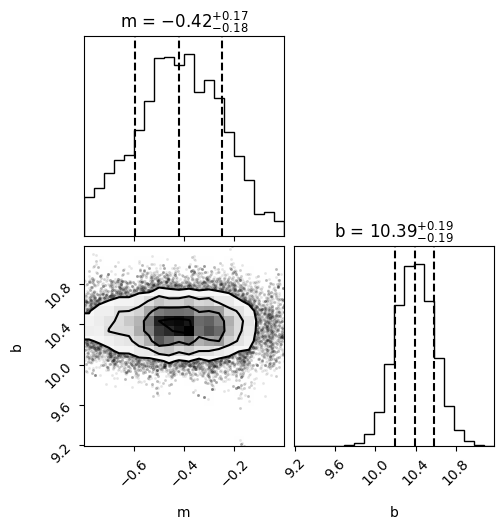

In [105]:
figure = corner.corner(cadena, labels=['m', 'b', 'm'], fontsize =12, quantiles=[0.16, .5, .84], show_titles=True)